서울시 지하철 호선별 역별 승하차 인원정보

#1.1 데이터 읽기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('CARD_SUBWAY_MONTH_2022.csv', encoding='cp949', engine='python', names=columns, header=0, skipinitialspace=True)

print(df.head())

       사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자
0  20220101  3호선   수서    7370    7076  20220104
1  20220101  3호선  학여울     461     473  20220104
2  20220101  3호선   대청    3224    2903  20220104
3  20220101  3호선   일원    3321    2803  20220104
4  20220101  경원선   창동       1       0  20220104


In [78]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104


In [80]:
df.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

#1.2 데이터 정제

In [82]:
#날짜 형식을 datetime을 이용해 바꾸기
pd.to_datetime(['20221125'])
pd.to_datetime([20221125])

DatetimeIndex(['1970-01-01 00:00:00.020221125'], dtype='datetime64[ns]', freq=None)

In [84]:
theday = pd.to_datetime(df.사용일자, format='%Y%m%d', errors='coerce')
theday

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
219740   2022-12-31
219741   2022-12-31
219742   2022-12-31
219743   2022-12-31
219744   2022-12-31
Name: 사용일자, Length: 219745, dtype: datetime64[ns]

In [86]:
df['year'] = theday.dt.year
df['month'] = theday.dt.month
df['day'] = theday.dt.day
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,year,month,day
0,20220101,3호선,수서,7370,7076,20220104,2022,1,1
1,20220101,3호선,학여울,461,473,20220104,2022,1,1
2,20220101,3호선,대청,3224,2903,20220104,2022,1,1
3,20220101,3호선,일원,3321,2803,20220104,2022,1,1
4,20220101,경원선,창동,1,0,20220104,2022,1,1
...,...,...,...,...,...,...,...,...,...
219740,20221231,4호선,신용산,11025,12099,20230103,2022,12,31
219741,20221231,경부선,석수,5643,5147,20230103,2022,12,31
219742,20221231,경부선,금천구청,7519,7426,20230103,2022,12,31
219743,20221231,경부선,가산디지털단지,5579,7299,20230103,2022,12,31


In [88]:
#승차총승객수, 하차총승객수를 더해서 total값 생성
df['total'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,year,month,day,total
0,20220101,3호선,수서,7370,7076,20220104,2022,1,1,14446
1,20220101,3호선,학여울,461,473,20220104,2022,1,1,934
2,20220101,3호선,대청,3224,2903,20220104,2022,1,1,6127
3,20220101,3호선,일원,3321,2803,20220104,2022,1,1,6124
4,20220101,경원선,창동,1,0,20220104,2022,1,1,1
...,...,...,...,...,...,...,...,...,...,...
219740,20221231,4호선,신용산,11025,12099,20230103,2022,12,31,23124
219741,20221231,경부선,석수,5643,5147,20230103,2022,12,31,10790
219742,20221231,경부선,금천구청,7519,7426,20230103,2022,12,31,14945
219743,20221231,경부선,가산디지털단지,5579,7299,20230103,2022,12,31,12878


In [90]:
df.sort_values(by='total', ascending=False).head(10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,year,month,day,total
58995,20220409,2호선,잠실(송파구청),122543,118237,20220412,2022,4,9,240780
79176,20220513,2호선,강남,95342,98137,20220516,2022,5,13,193479
82888,20220520,2호선,강남,95179,98286,20220523,2022,5,20,193465
116915,20220715,2호선,강남,96795,96558,20220718,2022,7,15,193353
75064,20220506,2호선,잠실(송파구청),97288,95576,20220509,2022,5,6,192864
87575,20220527,2호선,강남,94765,97836,20220530,2022,5,27,192601
113045,20220708,2호선,강남,96077,95228,20220711,2022,7,8,191305
58452,20220408,2호선,잠실(송파구청),95304,95925,20220411,2022,4,8,191229
180386,20221028,2호선,잠실(송파구청),95408,95061,20221031,2022,10,28,190469
104014,20220624,2호선,강남,94875,95390,20220627,2022,6,24,190265


#1.2.1 승하차 총 승객수, 승차 총 승객 수 데이터 출력

In [92]:
df_st = df.groupby('역명').sum().sort_values(by='total', ascending=False)[['total']].head(10)
df_st

,total
역명,
잠실(송파구청),60624028
서울역,53349976
홍대입구,52697205
고속터미널,52696727
강남,51764650
사당,42905316
선릉,41853936
신림,39975593
가산디지털단지,37408464


#1.2.2 10월 데이터만 출력

In [94]:
Oct = df[df['month'] == 10]
Oct

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,year,month,day,total
163976,20221001,3호선,고속터미널,59124,62989,20221004,2022,10,1,122113
163977,20221001,3호선,교대(법원.검찰청),8040,4875,20221004,2022,10,1,12915
163978,20221001,3호선,학여울,3355,3401,20221004,2022,10,1,6756
163979,20221001,3호선,대청,6517,5926,20221004,2022,10,1,12443
163980,20221001,3호선,일원,6231,6025,20221004,2022,10,1,12256
...,...,...,...,...,...,...,...,...,...,...
182756,20221031,6호선,버티고개,2366,2239,20221103,2022,10,31,4605
182757,20221031,6호선,약수,3778,3751,20221103,2022,10,31,7529
182758,20221031,6호선,청구,3842,4067,20221103,2022,10,31,7909
182759,20221031,6호선,신당,8136,8814,20221103,2022,10,31,16950


#1.2.3 데이터에 datetime을 이용하여 요일 추가

In [98]:
from datetime import datetime

In [102]:
date_str = str(20221127)
date = datetime.strptime(date_str, "%Y%m%d")
date

datetime.datetime(2022, 11, 27, 0, 0)

In [106]:
#월요일0 ~ 일요일6
weekday = date.weekday()
weekday

6

In [110]:
weekday_dict = ['월','화','수','목','금','토','일']
weekday_list = []

for date_str in df['사용일자']:
    date = datetime.strptime(str(date_str), "%Y%m%d")
    weekday_index = date.weekday()
    weekday = weekday_dict[weekday_index]
    weekday_list.append(weekday)

#1.2.3 데이터에 datetime을 이용하여 요일 추가

In [114]:
df['요일'] = weekday_list
df.sample(10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,year,month,day,total,요일
201974,20221202,6호선,새절(신사),13897,12675,20221205,2022,12,2,26572,금
51134,20220327,경부선,의왕,3886,3895,20220330,2022,3,27,7781,일
11583,20220120,9호선2~3단계,봉은사,17043,17586,20220123,2022,1,20,34629,목
12476,20220121,3호선,잠원,5067,4844,20220124,2022,1,21,9911,금
38133,20220305,5호선,영등포구청,1683,1616,20220308,2022,3,5,3299,토
169854,20221010,경원선,왕십리(성동구청),10237,11763,20221013,2022,10,10,22000,월
28671,20220218,2호선,을지로3가,19882,20103,20220221,2022,2,18,39985,금
72384,20220502,경부선,군포,8169,8072,20220505,2022,5,2,16241,월
25509,20220212,경인선,부개,5646,5271,20220215,2022,2,12,10917,토
41973,20220312,경부선,오산대,2433,2110,20220315,2022,3,12,4543,토


In [120]:
#1호선 데이터 정제
line = '1호선'
df_line = df[df['노선명'] == line]

df1 = df_line.pivot_table(index = ['역명'], columns ='요일', values = '승차총승객수', aggfunc = 'sum')
df1 = df1[['월','화','수','목','금','토','일']]
df1 = df1/10000
df1

요일,월,화,수,목,금,토,일
역명,,,,,,,
동대문,54.3429,55.8567,56.0116,56.6508,58.6678,55.4052,49.3857
동묘앞,37.8809,39.6517,40.3143,40.7326,43.2191,58.1224,59.7602
서울역,229.6132,233.2031,234.0700,242.9461,266.1153,195.4721,156.1413
시청,114.1914,125.4394,124.5253,126.9250,126.5284,80.4116,49.2339
신설동,66.8970,69.8462,71.1780,72.4587,75.1771,51.9406,39.4963
제기동,83.9829,87.9607,86.9770,89.6629,91.4831,80.1851,51.9739
종각,175.2284,188.5356,190.7151,194.1798,194.5989,114.6510,73.1170
종로3가,122.9945,129.6938,131.1066,134.7666,141.2291,127.3315,79.3282
종로5가,111.7593,118.3387,117.8967,121.4969,124.8800,104.3186,53.6399


#1.3 데이터 시각화

In [124]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

<BarContainer object of 26 artists>

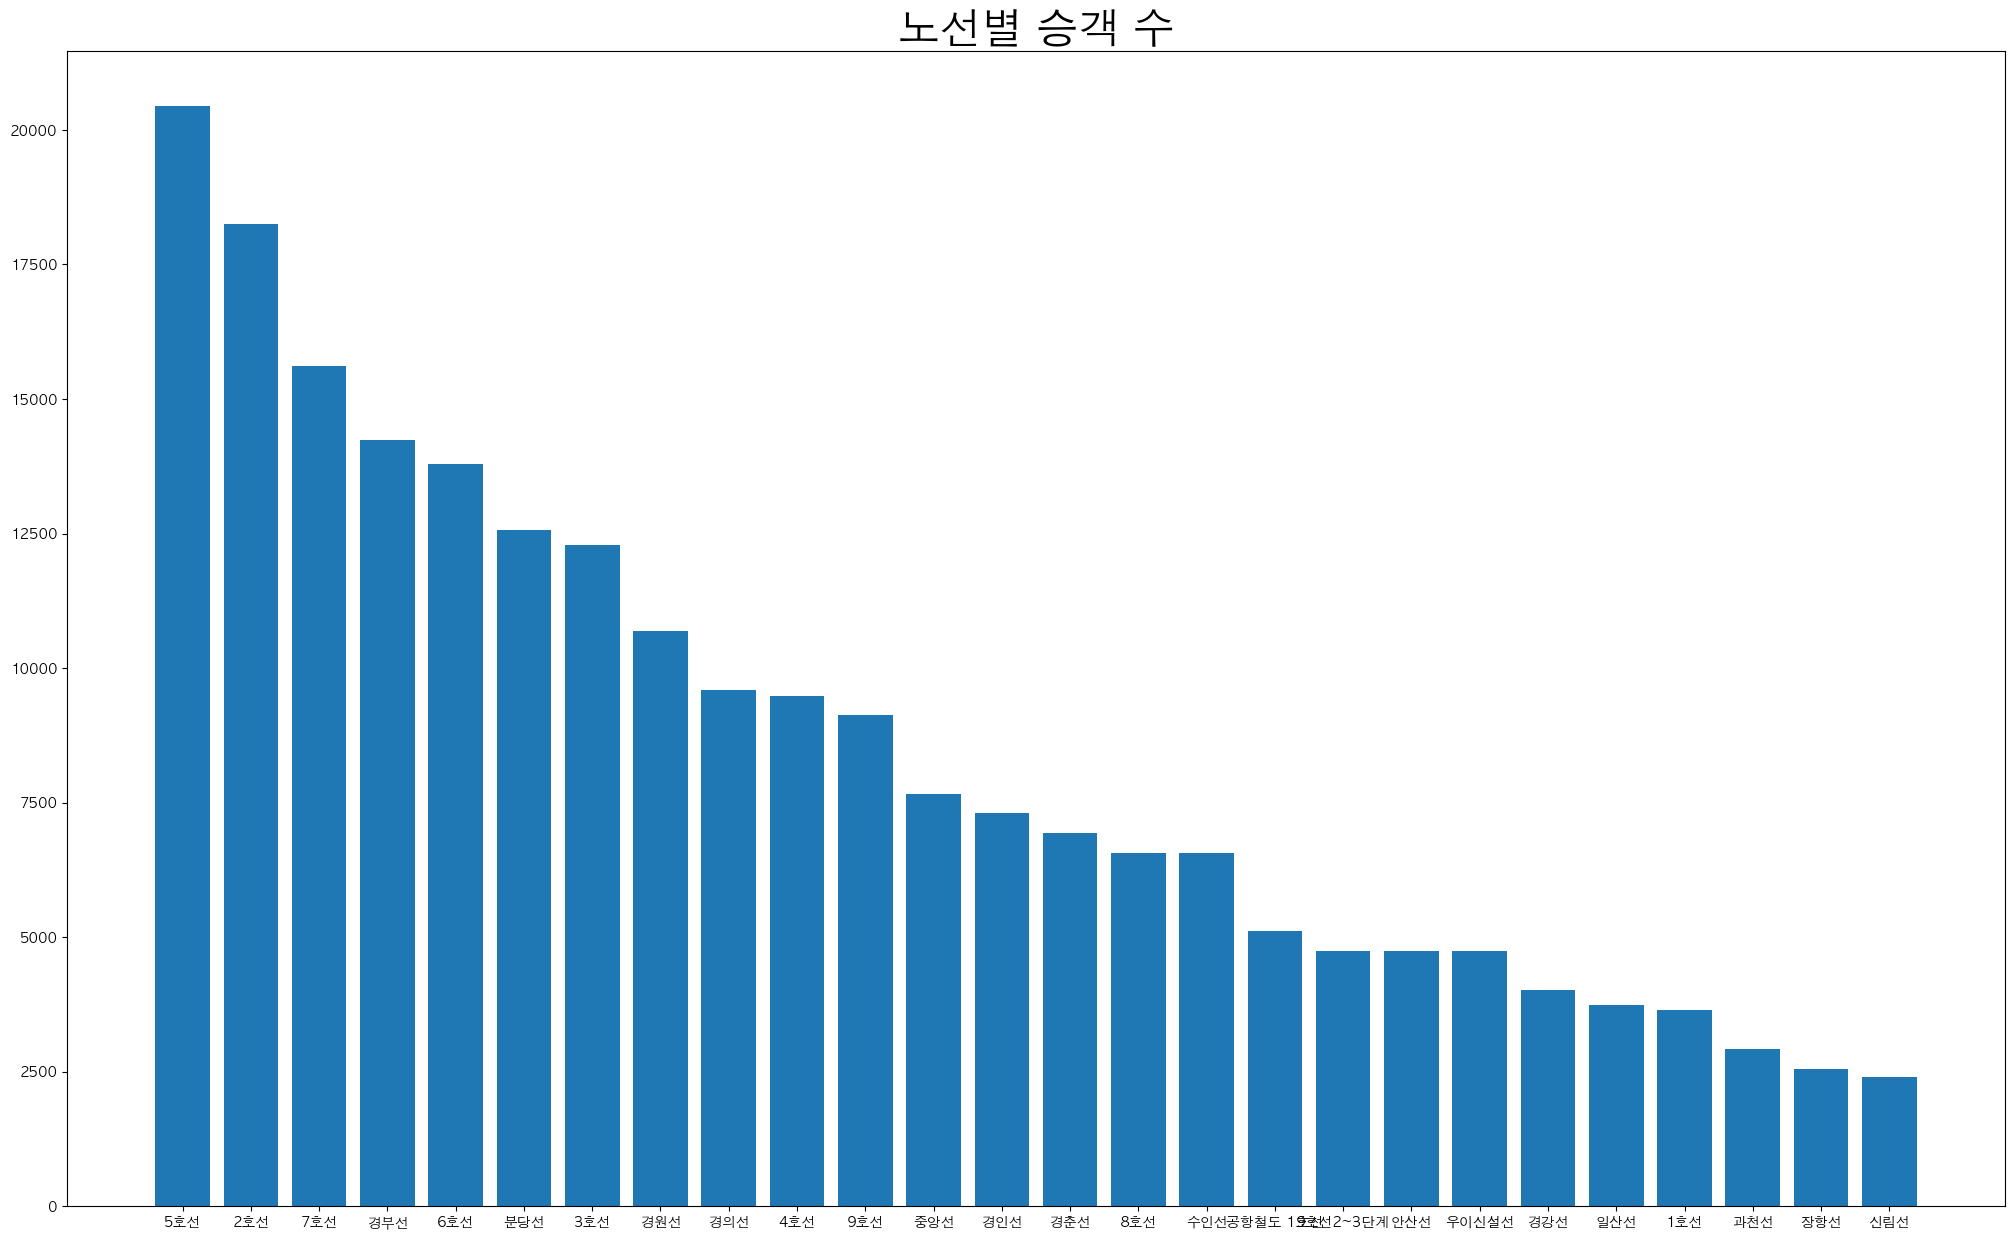

In [146]:
plt.figure(figsize=[25,15])
plt.title('노선별 승객 수', fontsize=30)
plt.bar(df['노선명'].value_counts().index,
        df['노선명'].value_counts().values)

- 호선별승객수는 5호선>2호선>7호선>경부선>6호선>분당선

>>
- 5호선은 광역 연결성과 주요 환승역 효과로 인해 승객수가 크게 집계됨
- 2호선은 일반적으로 혼잡함에도 불구하고 환승 승객 분배 및 데이터 집계 방식의 영향으로 다소 낮게 나타난 것으로 보임
- 7호선은 서울 외곽 연결 및 신규 노선 특성으로 중간 순위를 기록했고, 경부선, 6호선, 분당선은 운영 구간, 지역 특성, 집계 방식의 차이로 인해 상대적으로 낮은 승객수를 보인 것으로 분석됨

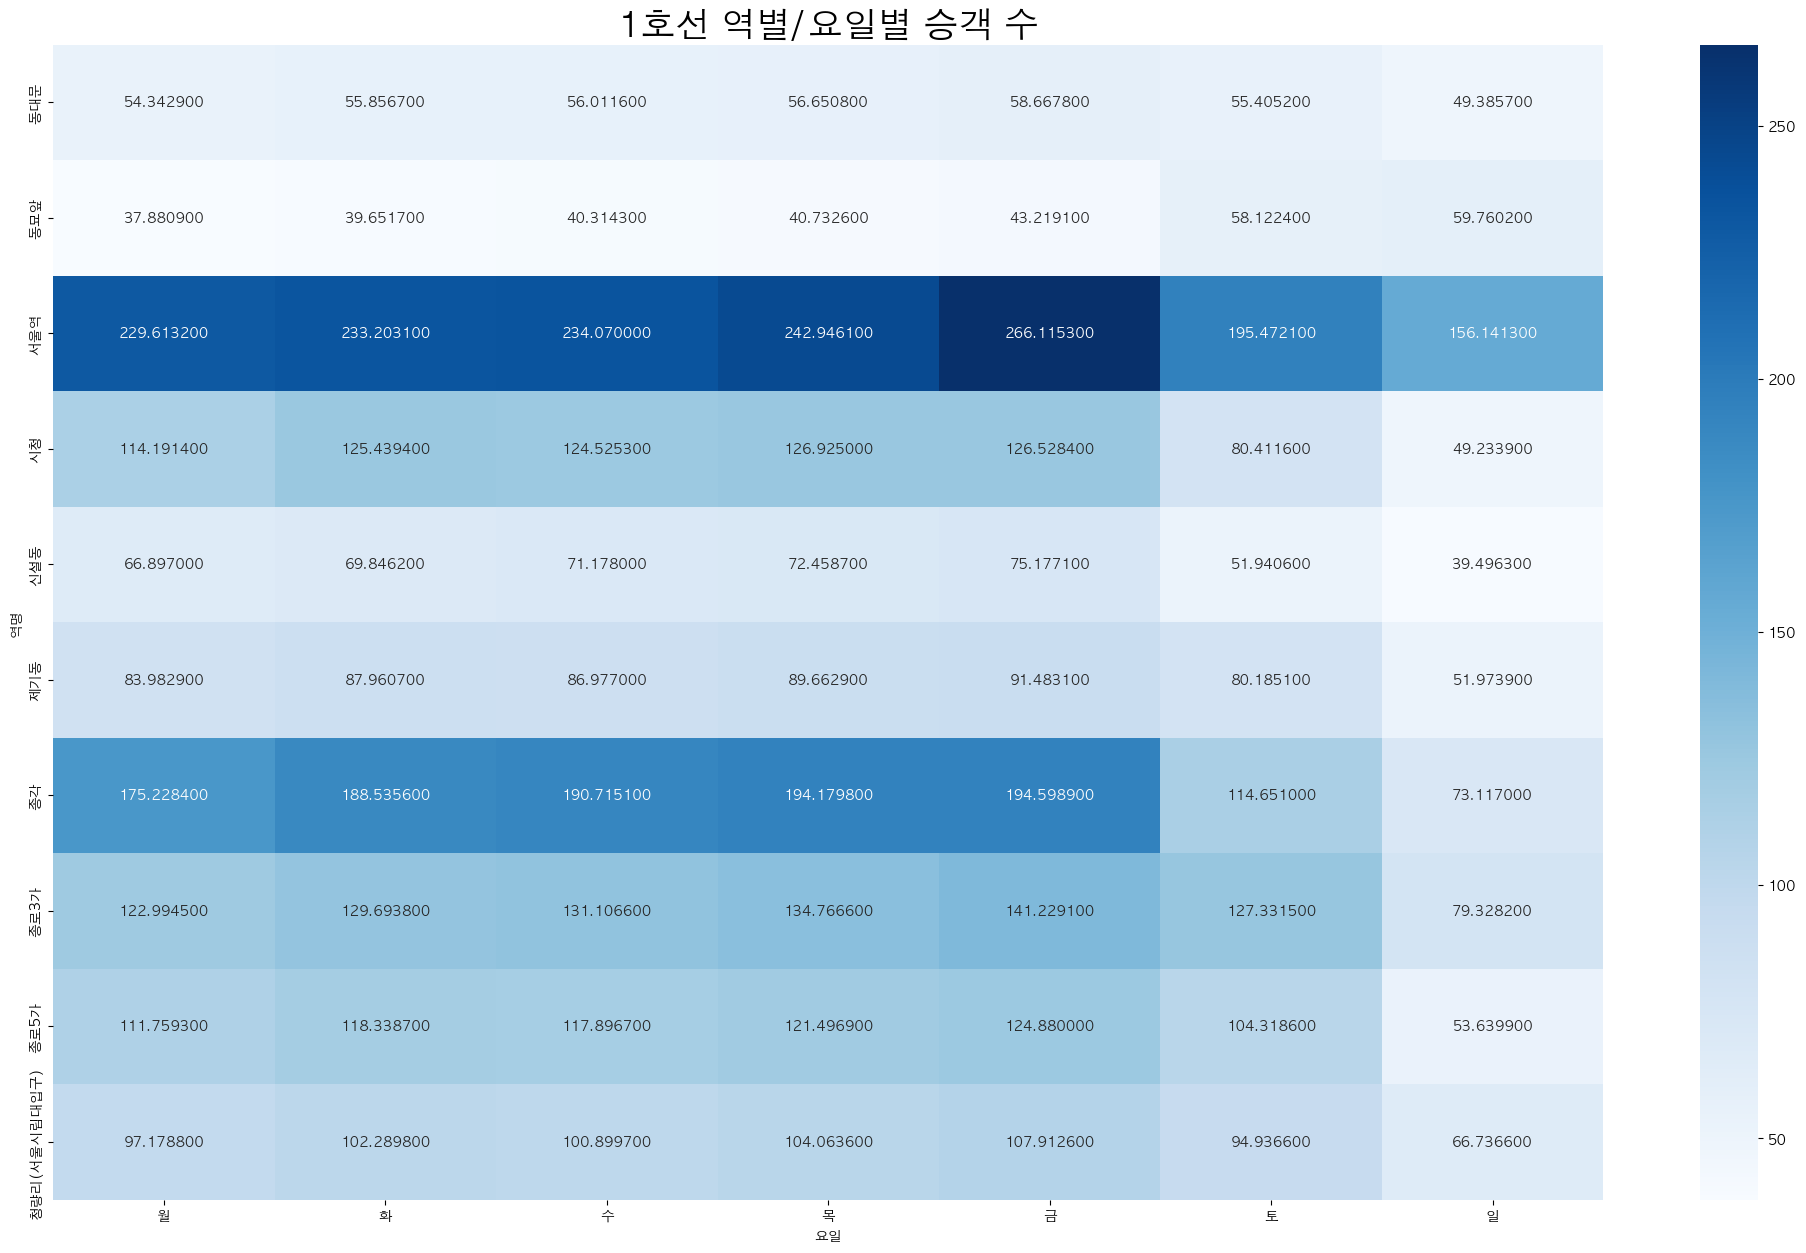

In [142]:
import seaborn as sns

plt.figure(figsize=[25,15])
sns.heatmap(df1, cmap='Blues', annot=True, fmt='f')
plt.title('1호선 역별/요일별 승객 수', fontsize=25)
plt.show()

In [ ]:
- 일요일에 전체적으로 승객수가 떨어짐
- 서울역이 대체적으로 승객수가 가장 많고, 금요일에 승객 수가 가장 많음
- 서울역 다음으로는 종각역이 승객수가 가장 많음

>>
- 일요일의 전체 승객수가 낮게 나타나는 것은 주중 출퇴근 수요가 급감하고, 여가 목적으로 이동하는 승객의 패턴이 평일과 다르기 때문
- 서울역은 다양한 교통 수단이 집결하는 중심 허브로서 금요일과 같은 피크 시간에 평소보다 더 많은 승객이 몰리며, 종각역도 유사한 위치적 장점을 통해 높은 승객 수를 기록함